In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os

In [1]:
# --------------------------------
# Path Settings
# --------------------------------

Regions = ["Basal Ganglia", "Corona Radiata", "Corpus Callosum", "Cortex"]
Region = Regions[1]

Tests = ['Traction', 'Compression', 'Simple Shear']
Test  = Tests[1]

Models = ['Incompressible Neo-Hookean','Incompressible Ogden', 'Hybrid Ogden', 'Compressible Neo-Hookean']

Nu = [0.49, 0.45, 0.40]
Nelements = [5, 10, 20]

Area = 25

Results     = 'Nu' + str(Nu[0]) + '_' + str(Nelements[0]) + 'Elements_'+ Test + 'Stresses'

Path0 = os.path.join('Results', Models[0], Results)
Path1 = os.path.join('Results', Models[1], Results)
Path2 = os.path.join('Results', Models[2], Results)
Path3 = os.path.join('Results', Models[3], Results)

NameError: name 'Nelements' is not defined

In [3]:
# --------------------------------
# Import data
# --------------------------------

BuddayFolder = "Budday2019Data"
AbaqusFolder = "AbaqusData"

# Region of the brain
if Region == Regions[0]:
    Rn = "BasalGanglia"
    Rd = "BG"    
elif Region == Regions[1]:
    Rn = "CoronaRadiata"
    Rd = "CR"
elif Region == Regions[2]:
    Rn = "CorpusCallosum"
    Rd = "CC"
elif Region == Regions[3]:
    Rn = "Cortex"
    Rd = "C"

# Import reference data
if Test  == Tests[0]:
    FEMDataO = "Tension_OgdenFEM_Dat.csv"
    AbaDataO = "Tension_OgdenSimultaneousParameters.csv"
    AbaDataN = "Tension_NeoHookSimultaneousParameters.csv"
    ExpData  = "Tension_ExpDat.csv"
    Test = "Traction"
    Xaxis = 'Stretches'
    Yaxis = "Nominal stress (kPa)"
    Height = 5
    
    FEMDataO = pd.read_csv(os.path.join("..", BuddayFolder, Rn, Rd + "_" + FEMDataO),delimiter=";", decimal=",",names=["FEMO " + Xaxis,"FEMO " + Yaxis])
    AbaDataO = pd.read_csv(os.path.join("..", AbaqusFolder, AbaDataO),delimiter="\s+", header=None, usecols=[1,2], names = ['Reaction Force O', 'Displacement O'])
    AbaDataN = pd.read_csv(os.path.join("..", AbaqusFolder, AbaDataN),delimiter="\s+", header=None, usecols=[1,2], names = ['Reaction Force H', 'Displacement H'])
    
#     print(AbaDataN)
    
elif Test  == Tests[1]:
    FEMDataN = "Compression_NeoHookFEM_Dat.csv"
    FEMDataO = "Compression_OgdenFEM_Dat.csv"
    AbaDataO = "Compression_OgdenSimultaneousParameters.csv"
    AbaDataN = "Compression_NeoHookSimultaneousParameters.csv"
    ExpData = "Compression_ExpDat.csv"
    Test = "Compression"
    Xaxis = 'Stretches'
    Yaxis = "Nominal stress (kPa)"
    Height = -5
    
    FEMDataO = pd.read_csv(os.path.join("..", BuddayFolder, Rn, Rd + "_" + FEMDataO),delimiter=";", decimal=",",names=["FEMO " + Xaxis,"FEMO " + Yaxis])
    FEMDataN = pd.read_csv(os.path.join("..", BuddayFolder, Rn, Rd + "_" + FEMDataN),delimiter=";", decimal=",",names=["FEMN " + Xaxis,"FEMN " + Yaxis])
    AbaDataO = pd.read_csv(os.path.join("..", AbaqusFolder, AbaDataO),delimiter="\s+", header=None, usecols=[2,3], names = ['Reaction Force O', 'Displacement O'])
    AbaDataN = pd.read_csv(os.path.join("..", AbaqusFolder, AbaDataN),delimiter="\s+", header=None, usecols=[2,3], names = ['Reaction Force H', 'Displacement H'])
    
    
elif Test  == Tests[2]:
    FEMDataO = "SimpleShear_OgdenFEM_Dat.csv"
    ExpData  = "SimpleShear_ExpDat.csv"
    AbaDataO = "SimpleShear_OgdenSimultaneousParameters.csv"
    AbaDataN = "SimpleShear_NeoHookSimultaneousParameters.csv"
    Test = "Simple Shear"
    Xaxis = "Shear (-)"
    Yaxis = "Shear stress (kPa)"
    Height = 5
    
    FEMDataO = pd.read_csv(os.path.join("..", BuddayFolder, Rn, Rd + "_" + FEMDataO),delimiter=";", decimal=",",names=["FEMO " + Xaxis,"FEMO " + Yaxis])
    AbaDataO = pd.read_csv(os.path.join("..", AbaqusFolder, AbaDataO),delimiter="\s+", header=None, usecols=[1,2], names = ['Reaction Force O', 'Displacement 0O'])
    AbaDataN = pd.read_csv(os.path.join("..", AbaqusFolder, AbaDataN),delimiter="\s+", header=None, usecols=[1,2], names = ['Reaction Force H', 'Displacement H'])

df0 = pd.read_pickle(Path0)
df1 = pd.read_pickle(Path1)
df2 = pd.read_pickle(Path2)
df3 = pd.read_pickle(Path3)

# Convert to dataframe
ExpData  = pd.read_csv(os.path.join("..", BuddayFolder, Rn, Rd + "_" + ExpData),delimiter=";", decimal=",",names=["Exp " + Xaxis,"Exp " + Yaxis])
if Test  == Tests[1]:
    datadf = pd.concat([FEMDataO, FEMDataN, ExpData, AbaDataO, AbaDataN], axis=1)
else:
    datadf = pd.concat([FEMDataO, ExpData, AbaDataO, AbaDataN], axis=1)
    
# Compute Stress and strain from force and displacement
datadf['Stress O']= datadf['Reaction Force O'] / Area
datadf['Strain O']= datadf['Displacement O'] / Height + 1
datadf['Stress H']= datadf['Reaction Force H'] / Area
datadf['Strain H']= datadf['Displacement H'] / Height + 1

# print(datadf)

df_pzz = pd.concat([df0['Stretches'], df0['pzz'],df1['pzz'],df2['pzz'],df3['pzz']], axis=1)
df_pzz.columns = ['Stretches', Models[0], Models[1], Models[2], Models[3]]
df_pzz

,Stretches,Incompressible Neo-Hookean,Incompressible Ogden,Hybrid Ogden,Compressible Neo-Hookean
0,0.999,-0.00421397,-0.00244003,-0.063017,-0.0209311
1,0.99,-0.0425163,-0.0268719,-0.0771116,-0.211157
2,0.98,-0.0858886,-0.0608275,-0.0972462,-0.4265
3,0.97,-0.130148,-0.10511,-0.123558,-0.646166
4,0.96,-0.175326,-0.16428,-0.158068,-0.870297
5,0.95,-0.221455,-0.244761,-0.203487,-1.09904
6,0.94,-0.26857,-0.355647,-0.26347,-1.33255
7,0.93,-0.316706,-0.50996,-0.342947,-1.57099
8,0.92,-0.365898,-0.726562,-0.448592,-1.81452
9,0.91,-0.416186,-1.03302,-0.589468,-2.06332


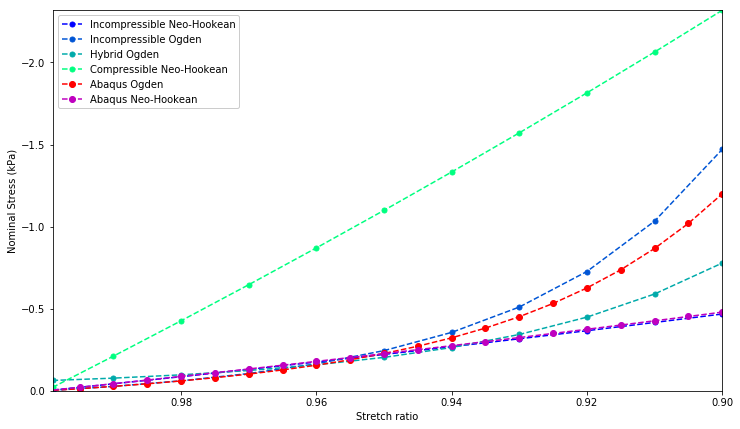

In [4]:
# --------------------------------
# Compare models
# --------------------------------

Xaxis = 'Stretches'

plt.rc('figure', figsize=[12,7])
fig, ax = plt.subplots(1, 1)

df_pzz.plot(ax = ax, x = Xaxis, colormap = 'winter', linestyle = '--', marker = 'o', markersize = 5)
datadf.plot(ax = ax, x = 'Strain O', y = "Stress O", color = 'r', linestyle = '--', marker = 'o', label = 'Abaqus Ogden')
datadf.plot(ax = ax, x = 'Strain H', y = "Stress H", color = 'm', linestyle = '--', marker = 'o', label = 'Abaqus Neo-Hookean')

ax.set_xlabel('Stretch ratio')
ax.set_ylabel('Nominal Stress (kPa)')
ax.set_xlim(df_pzz[Xaxis][0],df_pzz[Xaxis][10])
if Test  == Tests[1]:
    ax.set_ylim(0,df_pzz[Models[3]][10])
ax.xaxis.set_major_locator(plt.MultipleLocator(0.02))
ax.legend(loc='upper left', frameon=True, framealpha=1)
plt.savefig(os.path.join('Results', Results + 'ModelsComparison.pdf'))

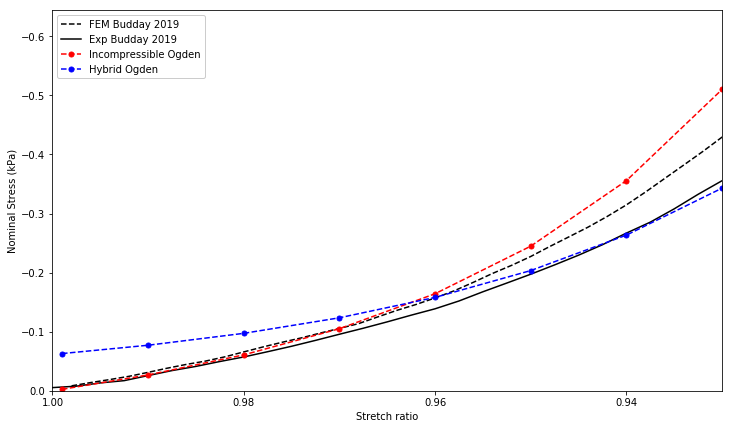

In [5]:
# --------------------------------
# Compare with Budday 2019
# --------------------------------

colors = ['r','fuchsia', 'blueviolet','mediumblue']
fig, ax = plt.subplots(1, 1)
datadf.plot(ax = ax, x = "FEMO " + Xaxis, y = "FEMO " + Yaxis, color = 'k', linestyle = '--', label = 'FEM Budday 2019')
datadf.plot(ax = ax, x = "Exp " + Xaxis, y = "Exp " + Yaxis, color = 'k', linestyle = '-', label = 'Exp Budday 2019')

df_pzz.plot(ax = ax, x = Xaxis, y = Models[1], color = 'r', linestyle = '--', marker = 'o', markersize = 5)
df_pzz.plot(ax = ax, x = Xaxis, y = Models[2], color = 'b', linestyle = '--', marker = 'o', markersize = 5)

ax.set_xlabel('Stretch ratio')
ax.set_ylabel('Nominal Stress (kPa)')
if Test  == Tests[1]:
    ax.set_ylim(0,datadf['FEMO '+Yaxis][34]*1.5)
ax.set_xlim(1,datadf['FEMO '+Xaxis][34])
ax.xaxis.set_major_locator(plt.MultipleLocator(0.02))
ax.legend(loc='upper left', frameon=True, framealpha=1)
plt.savefig(os.path.join('Results', Results + 'OgdenComparison.pdf'))

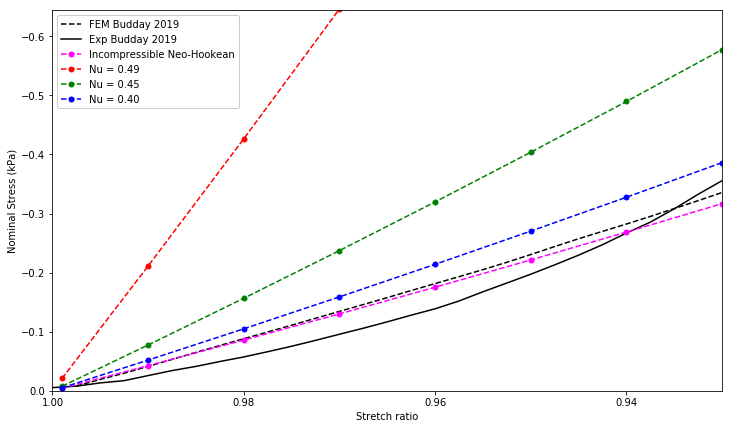

In [6]:
# --------------------------------
# Influence of nu
# --------------------------------

# Set path
Results49     = 'Nu' + str(Nu[0]) + '_' + Test + 'Stresses'
Results45     = 'Nu' + str(Nu[1]) + '_' + Test + 'Stresses'
Results40     = 'Nu' + str(Nu[2]) + '_' + Test + 'Stresses'

Path49 = os.path.join('Results', Models[3], Results49)
Path45 = os.path.join('Results', Models[3], Results45)
Path40 = os.path.join('Results', Models[3], Results40)

# Import data
df49 = pd.read_pickle(Path49)
df45 = pd.read_pickle(Path45)
df40 = pd.read_pickle(Path40)

# Convert to dataframe
df_nu = pd.concat([df49['Stretches'], df49['pzz'],df45['pzz'],df40['pzz']], axis=1)
df_nu.columns = ['Stretches', Nu[0], Nu[1], Nu[2]]

# Plot
fig, ax = plt.subplots(1, 1)
if Test  == Tests[1]:
    datadf.plot(ax = ax, x = "FEMN " + Xaxis, y = "FEMN " + Yaxis, color = 'k', linestyle = '--', label = 'FEM Budday 2019')
datadf.plot(ax = ax, x = "Exp " + Xaxis, y = "Exp " + Yaxis, color = 'k', linestyle = '-', label = 'Exp Budday 2019')
df_pzz.plot(ax = ax, x = Xaxis, y = Models[0], color = colors[1], linestyle = '--', marker = 'o', markersize = 5)
df_nu.plot(ax = ax, x = Xaxis, y = Nu[0], color = 'r', linestyle = '--', marker = 'o', markersize = 5, label = 'Nu = 0.49')
df_nu.plot(ax = ax, x = Xaxis, y = Nu[1], color = 'g', linestyle = '--', marker = 'o', markersize = 5, label = 'Nu = 0.45')
df_nu.plot(ax = ax, x = Xaxis, y = Nu[2], color = 'b', linestyle = '--', marker = 'o', markersize = 5, label = 'Nu = 0.40')
ax.set_xlabel('Stretch ratio')
ax.set_ylabel('Nominal Stress (kPa)')
ax.set_ylim(0,datadf['FEMO '+Yaxis][34]*1.5)
ax.set_xlim(1,datadf['FEMO '+Xaxis][34])
ax.xaxis.set_major_locator(plt.MultipleLocator(0.02))
ax.legend(loc='upper left', frameon=True, framealpha=1)
plt.savefig(os.path.join('Results', Results + 'NeoHookeanComparison.pdf'))

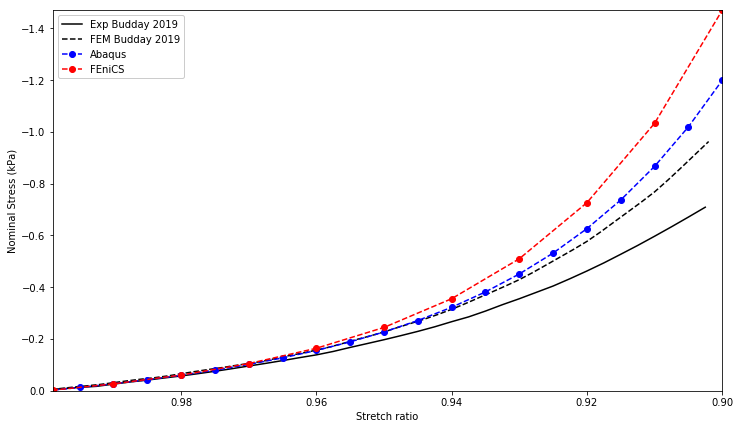

In [7]:
# --------------------------------
# Compare Software
# --------------------------------

Xaxis = 'Stretches'

plt.rc('figure', figsize=[12,7])
fig, ax = plt.subplots(1, 1)

datadf.plot(ax = ax, x = "Exp " + Xaxis, y = "Exp " + Yaxis, color = 'k', linestyle = '-', label = 'Exp Budday 2019')
datadf.plot(ax = ax, x = "FEMO " + Xaxis, y = "FEMO " + Yaxis, color = 'k', linestyle = '--', label = 'FEM Budday 2019')
datadf.plot(ax = ax, x = 'Strain O', y = "Stress O", color = 'b', linestyle = '--', marker = 'o', label = 'Abaqus')


df_pzz.plot(ax = ax, x = Xaxis, y = Models[1], color = 'r', linestyle = '--', marker = 'o', label = 'FEniCS')

ax.set_xlabel('Stretch ratio')
ax.set_ylabel('Nominal Stress (kPa)')
ax.set_xlim(df_pzz[Xaxis][0],df_pzz[Xaxis][10])
if Test  == Tests[1]:
    ax.set_ylim(0,df_pzz[Models[1]][10])
ax.xaxis.set_major_locator(plt.MultipleLocator(0.02))
ax.legend(loc='upper left', frameon=True, framealpha=1)
plt.savefig(os.path.join('Results', Results + 'SoftwareComparison.pdf'))